# XBeach grid expansion

Expand the lateral and offshore extentes of the grid to allow for data extension.

### Requirements

- Clone and install the [main](https://github.com/rom-py/rompy-xbeach) version of rompy-xbeach

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from rompy_xbeach.grid import GeoPoint, RegularGrid

import warnings
warnings.filterwarnings("ignore")

The other parameters to construct the grid are similar to the ones in the `SwanGrid`
object with the inclusion of the `crs` to define the coordinate system of the xbeach
grid. Notice the origin coordinates can be prescribed in any known coordinate system

In [2]:
grid1 = RegularGrid(
    ori=GeoPoint(x=115.5875, y=-32.646, crs="epsg:4326"),
    alfa=344.0,
    dx=100,
    dy=100,
    nx=27,
    ny=61,
    crs=28350,
)

### Expand grid boundaries

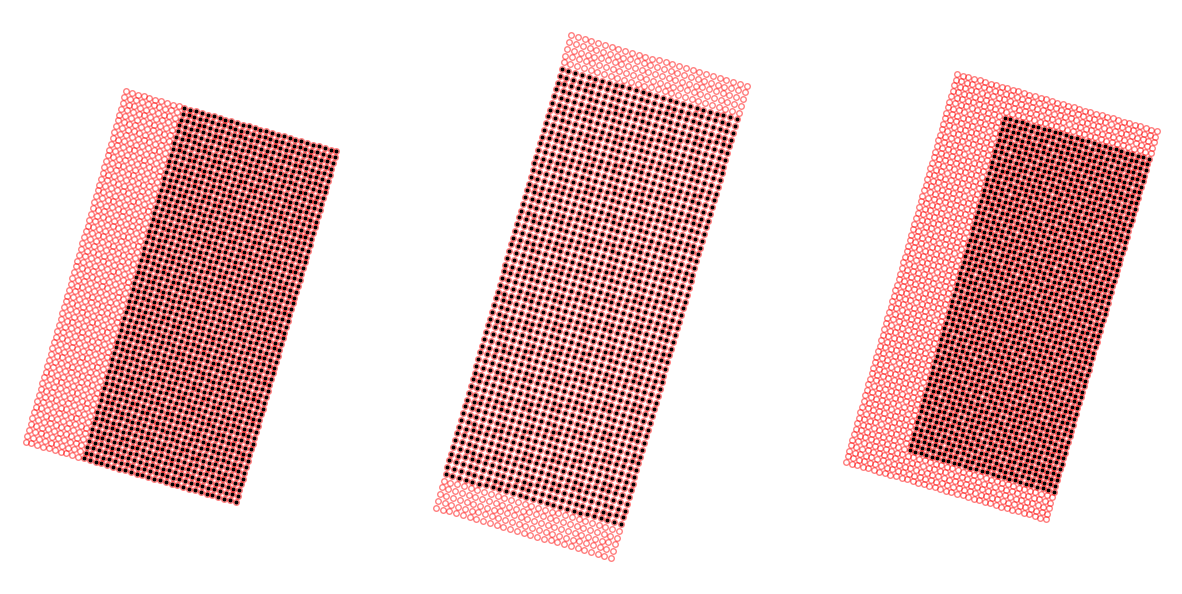

In [3]:
def plot_grid(ax, grid1, grid2):
    ax.plot(grid1.x, grid1.y, "k.", markersize=4, alpha=1.0)
    ax.plot(grid2.x, grid2.y, "ro", markerfacecolor="none", markersize=4, alpha=0.5)
    ax.set_aspect("equal")
    ax.axis("off")
    return ax

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Offshore only
ax = axs[0]
grid2 = grid1.expand(front=10)
ax = plot_grid(ax, grid1, grid2)

# Lateral only
ax = axs[1]
grid2 = grid1.expand(left=5, right=5)
ax = plot_grid(ax, grid1, grid2)

# Offshore and lateral
ax = axs[2]
grid2 = grid1.expand(front=10, left=5, right=5)
ax = plot_grid(ax, grid1, grid2)

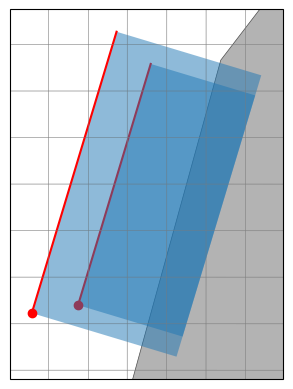

In [4]:
ax = grid1.plot(scale="i")
ax = grid2.plot(ax=ax)